In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
runs = ["L9", "L6", "L3", "L9_2p5k", "L9_2p5k_spatialuni"]

with open(f"../results_03_15/places_{runs[3]}.txt", 'r') as f:
    run = f.read()

In [3]:
cols = ['level', 'level_step', 'row', 'col', 'count']
res = pd.DataFrame([i.split("=")[0].split(",") + [int(i.split("=")[1])] for i in run.split(", ")], columns=cols)

In [4]:
res

,level,level_step,row,col,count
0,2,4.0,64,40,1445
1,2,4.0,64,41,970
2,2,4.0,64,42,1308
3,2,4.0,64,43,925
4,2,4.0,64,44,50
...,...,...,...,...,...
8988,1,2.0,147,77,99
8989,1,2.0,147,76,100
8990,3,8.0,57,21,185
8991,3,8.0,57,22,308


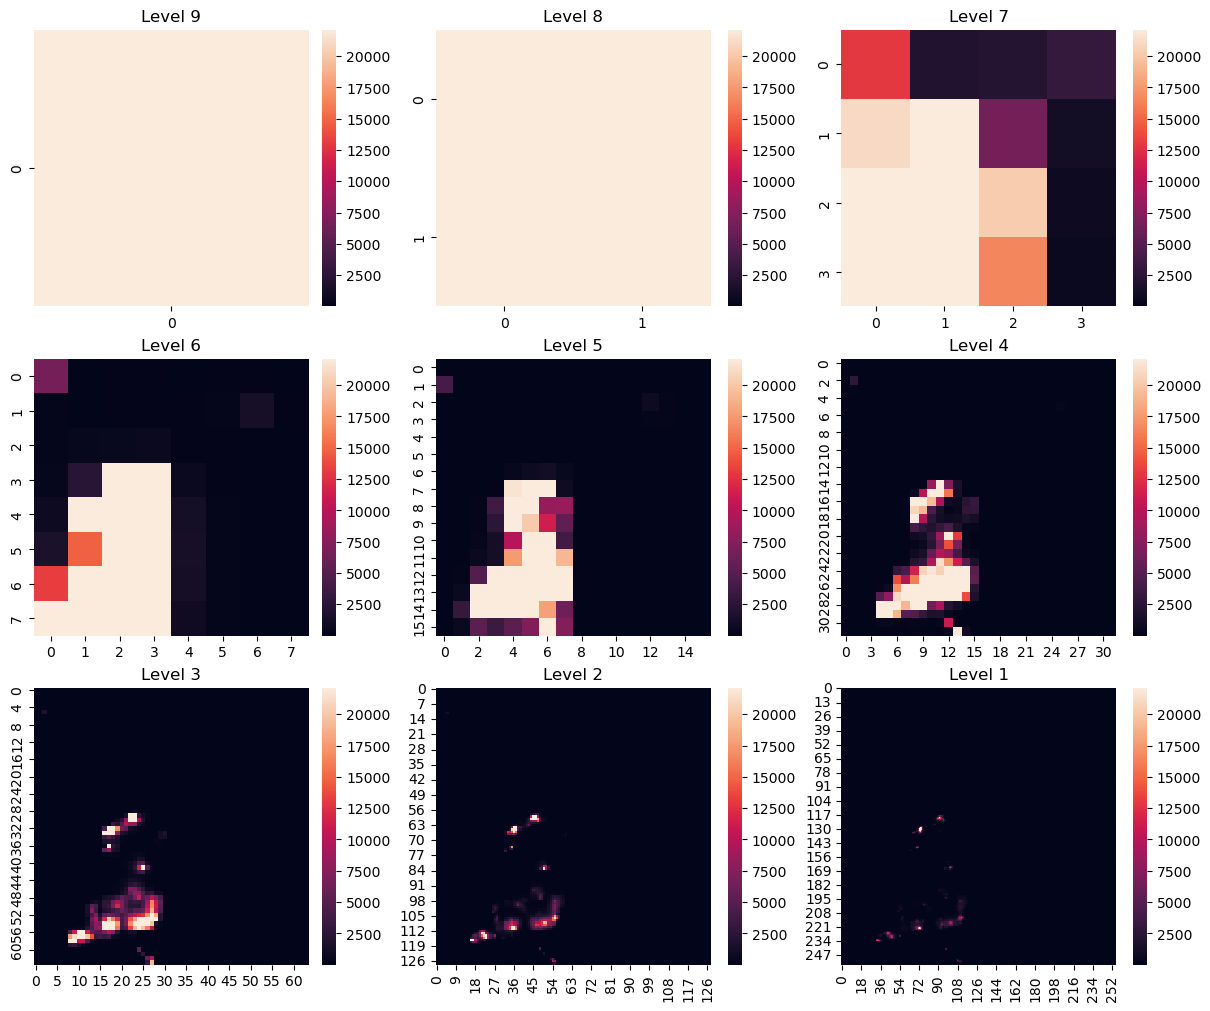

In [5]:
max_level = int(res['level'].max())

fig, axs = plt.subplots(ncols=3, nrows=int(max_level/3), figsize=(12, 10),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
level = max_level
for row in range(int(max_level/3)):
    for col in range(3):
        mat_size = int(math.pow(2, int(res['level'].max())) / math.pow(2, level))
        mat = np.zeros((mat_size, mat_size))
    
        data = res[res['level'] == str(level)]
        for r in data.loc[:, ['row', 'col', 'count']].values:
            mat[int(r[0])][int(r[1])] = r[2]
    
        # plt.figure()
        sns.heatmap(mat, vmin=res['count'].min(), vmax=res['count'].max() / 100, ax=axs[row, col])
        axs[row, col].set_title(f"Level {level}")
        level -= 1;
        # axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
        #                        transform=axs[row, col].transAxes,
        #                        ha='center', va='center', fontsize=18,
        #                        color='darkgrey')
# fig.suptitle('plt.subplots()')

In [6]:
# for level in range(int(res['level'].max()), int(res['level'].min()), -1):
#     mat_size = int(math.pow(2, int(res['level'].max())) / math.pow(2, level))
#     mat = np.zeros((mat_size, mat_size))

#     data = res[res['level'] == str(level)]
#     for row in data.loc[:, ['row', 'col', 'count']].values:
#         mat[int(row[0])][int(row[1])] = row[2]

#     # plt.figure()
#     sns.heatmap(mat, vmin=res['count'].min(), vmax=res['count'].max() / 100)
#     plt.title(f"Level {level}")
#     plt.show()
#     # plt.figure()
#     # plt.imshow(mat, vmin=res_l9['count'].min(), vmax=res_l9['count'].max())
#     # plt.show()
#     # print(mat)
#     # print()
#     # print([''])